In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Reading data from csv file

dataset = pd.read_csv('../DataSets/data_set.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

In [3]:
# Generating training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [4]:
# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 3))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))


In [5]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
4139/4139 [==============================] - 6s 1ms/step - loss: 16.8085 - accuracy: 0.0000e+00 - val_loss: 15.0275 - val_accuracy: 0.0000e+00
Epoch 2/100
4139/4139 [==============================] - 5s 1ms/step - loss: 15.0512 - accuracy: 0.0000e+00 - val_loss: 15.0336 - val_accuracy: 0.0000e+00
Epoch 3/100
4139/4139 [==============================] - 5s 1ms/step - loss: 15.0299 - accuracy: 0.0000e+00 - val_loss: 15.1264 - val_accuracy: 0.0000e+00
Epoch 4/100
4139/4139 [==============================] - 6s 1ms/step - loss: 15.0448 - accuracy: 0.0000e+00 - val_loss: 14.9033 - val_accuracy: 0.0000e+00
Epoch 5/100
4139/4139 [==============================] - 6s 1ms/step - loss: 15.0246 - accuracy: 0.0000e+00 - val_loss: 14.8760 - val_accuracy: 0.0000e+00
Epoch 6/100
4139/4139 [==============================] - 6s 1ms/step - loss: 15.0351 - accuracy: 0.0000e+00 - val_loss: 14.8682 - val_accuracy: 0.0000e+00
Epoch 7/100
4139/4139 [==============================] - 6s 1ms/step -

Epoch 54/100
4139/4139 [==============================] - 6s 1ms/step - loss: 2.7046 - accuracy: 0.0000e+00 - val_loss: 2.4201 - val_accuracy: 0.0000e+00
Epoch 55/100
4139/4139 [==============================] - 6s 1ms/step - loss: 2.5678 - accuracy: 0.0000e+00 - val_loss: 2.7548 - val_accuracy: 0.0000e+00
Epoch 56/100
4139/4139 [==============================] - 6s 1ms/step - loss: 2.3673 - accuracy: 0.0000e+00 - val_loss: 1.9161 - val_accuracy: 0.0000e+00
Epoch 57/100
4139/4139 [==============================] - 6s 1ms/step - loss: 2.5036 - accuracy: 0.0000e+00 - val_loss: 1.8612 - val_accuracy: 0.0000e+00
Epoch 58/100
4139/4139 [==============================] - 7s 2ms/step - loss: 2.4294 - accuracy: 0.0000e+00 - val_loss: 2.9734 - val_accuracy: 0.0000e+00
Epoch 59/100
4139/4139 [==============================] - 6s 2ms/step - loss: 2.3546 - accuracy: 0.0000e+00 - val_loss: 2.0195 - val_accuracy: 0.0000e+00
Epoch 60/100
4139/4139 [==============================] - 6s 1ms/step - loss

In [6]:
# Prediction

y_pred = classifier.predict(x_test)

In [7]:
# Mean squared error

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

3.789683473205236

In [8]:
# R2 Score

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8099105667037538

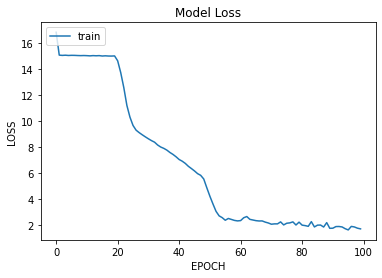

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

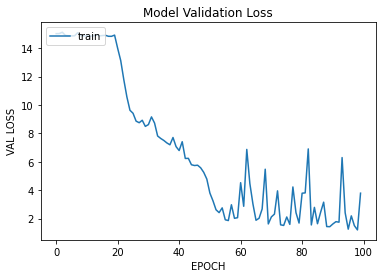

In [10]:
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

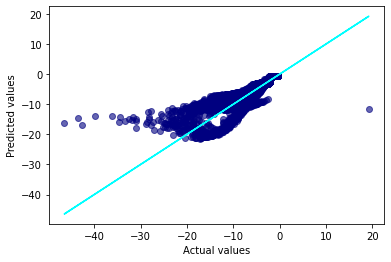

In [11]:
plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
plt.plot(y_test, y_test,color='cyan')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()